# Optimizing a Tech-Centric Portfolio during the 2022-2023 Fiscal Year

This notebook provides an analysis of stock portfolios to determine the optimal allocation of stocks to maximize the Sharpe Ratio, minimize volatility, and identify various other risk metrics.

Introduction
Stock portfolio optimization is a method used by investors to choose the amounts of different stocks to include in a portfolio. The aim is to maximize returns while keeping risks at an acceptable level. The analysis involves various metrics, including:

1. Adjusted Close Prices over time

2. Daily Returns of stocks

3. Histogram of daily returns

4. Efficient Frontier graph

5. Value at Risk (VaR)

6. Portfolio Beta



In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analyzing Adjusted Close Prices
Apple Inc. (AAPL)
We begin by analyzing the stock data of Apple Inc,
Followed by Amazon and Tesla.

In [93]:

df = pd.read_csv('AAPL.csv')


In [94]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,147.190002,150.229996,146.000000,149.449997,148.568634,75981900
1,2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441574,74732300
2,2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469238,88194300
3,2022-10-27,148.070007,149.050003,144.130005,144.800003,143.946075,109180200
4,2022-10-28,148.199997,157.500000,147.820007,155.740005,154.821548,164762400


In [146]:
import plotly.graph_objects as go

# Interactive line plot for Adjusted Close Prices
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Adj Close'], mode='lines', name='AAPL Adjusted Close'))
fig.show()

# Daily Returns
For each stock, we calculate the daily returns, which represent the percentage change in the stock price from the previous day.

In [96]:
df['Daily Return'] = df['Adj Close'].pct_change()


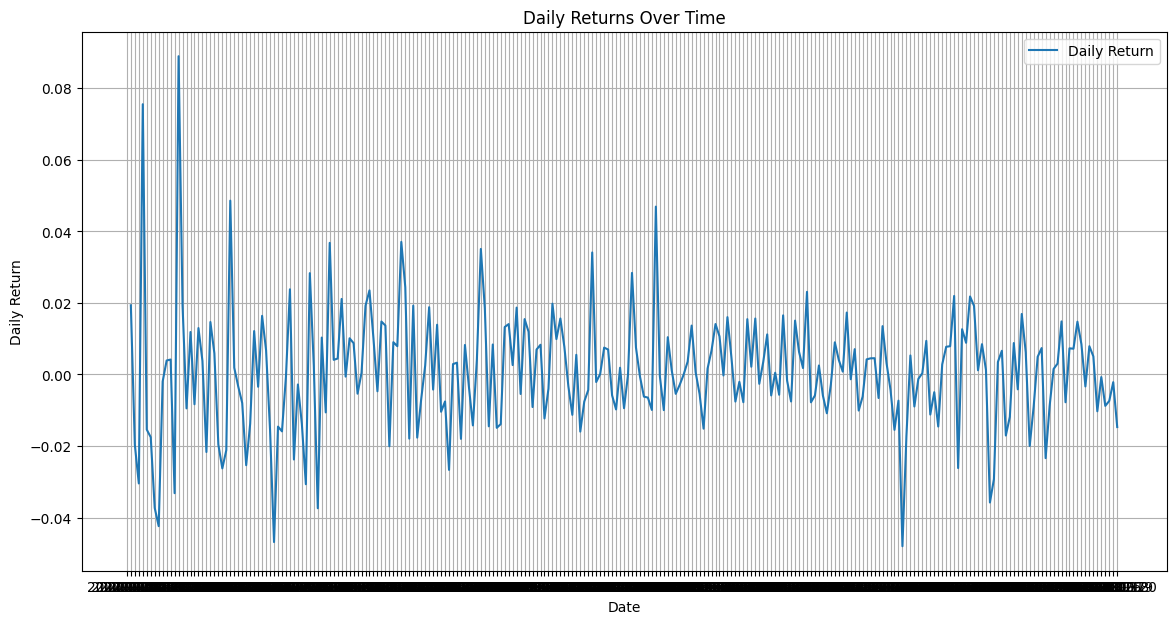

In [97]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return')
plt.legend()
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


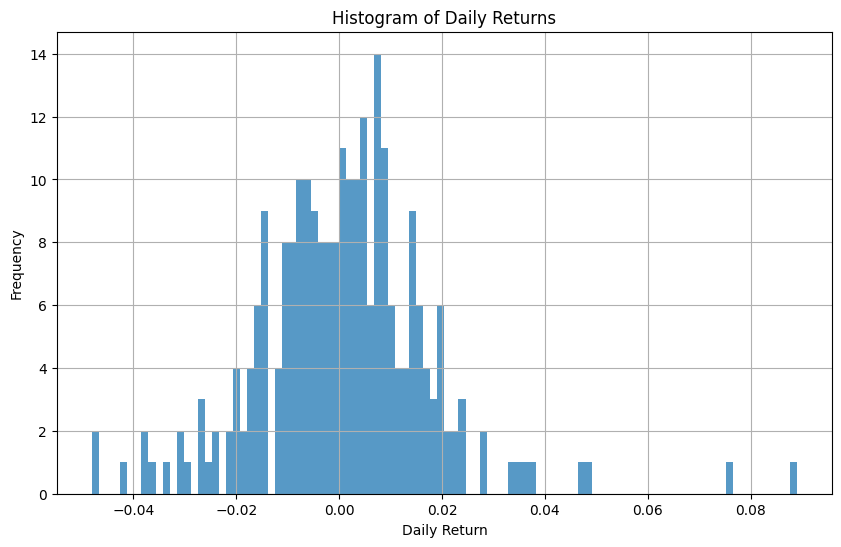

In [98]:
plt.figure(figsize=(10, 6))
df['Daily Return'].hist(bins=100, alpha=0.75)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [99]:
df1 = pd.read_csv('AMZN.csv')

In [155]:
import plotly.graph_objects as go

# Interactive line plot for Adjusted Close Prices
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Adj Close'], mode='lines', name='AMZN Adjusted Close'))
fig.show()

In [101]:
df1['Daily Return'] = df1['Adj Close'].pct_change()


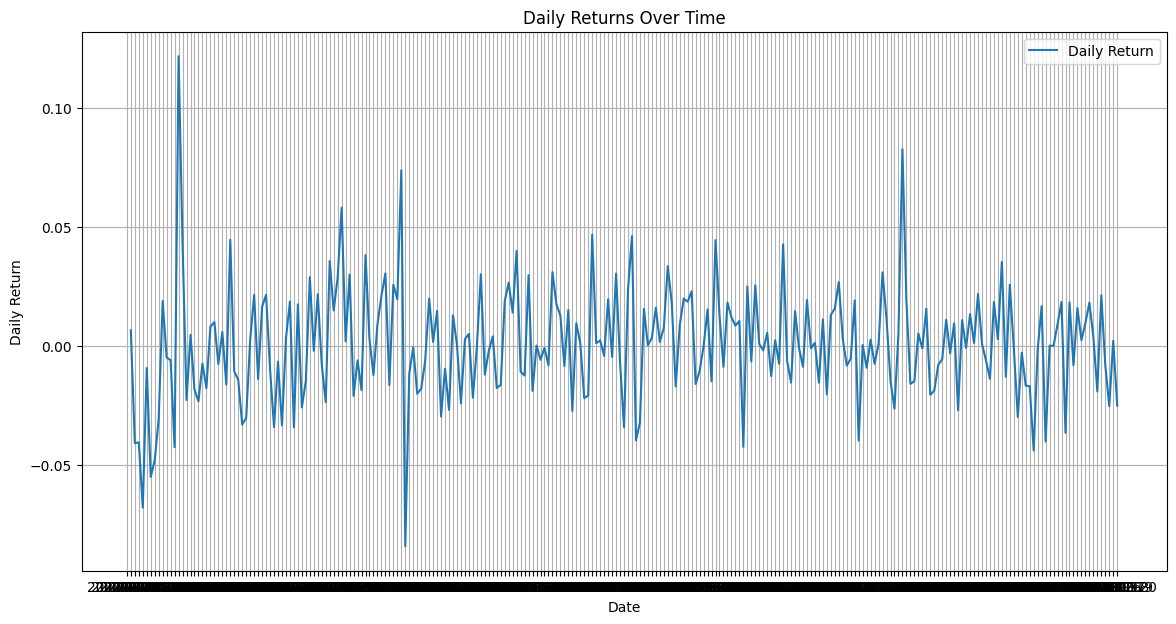

In [102]:
plt.figure(figsize=(14, 7))
plt.plot(df1['Date'], df1['Daily Return'], label='Daily Return')
plt.legend()
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

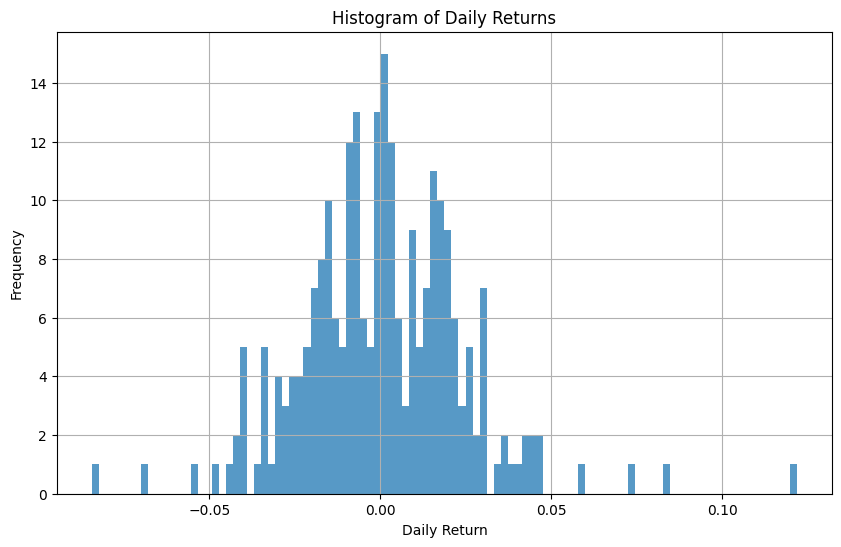

In [103]:
plt.figure(figsize=(10, 6))
df1['Daily Return'].hist(bins=100, alpha=0.75)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [104]:
df2 = pd.read_csv('TSLA.csv')


In [159]:
import plotly.graph_objects as go

# Interactive line plot for Adjusted Close Prices
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['Date'], y=df2['Adj Close'], mode='lines', name='TSLA Adjusted Close'))
fig.show()


In [106]:
df2['Daily Return'] = df2['Adj Close'].pct_change()

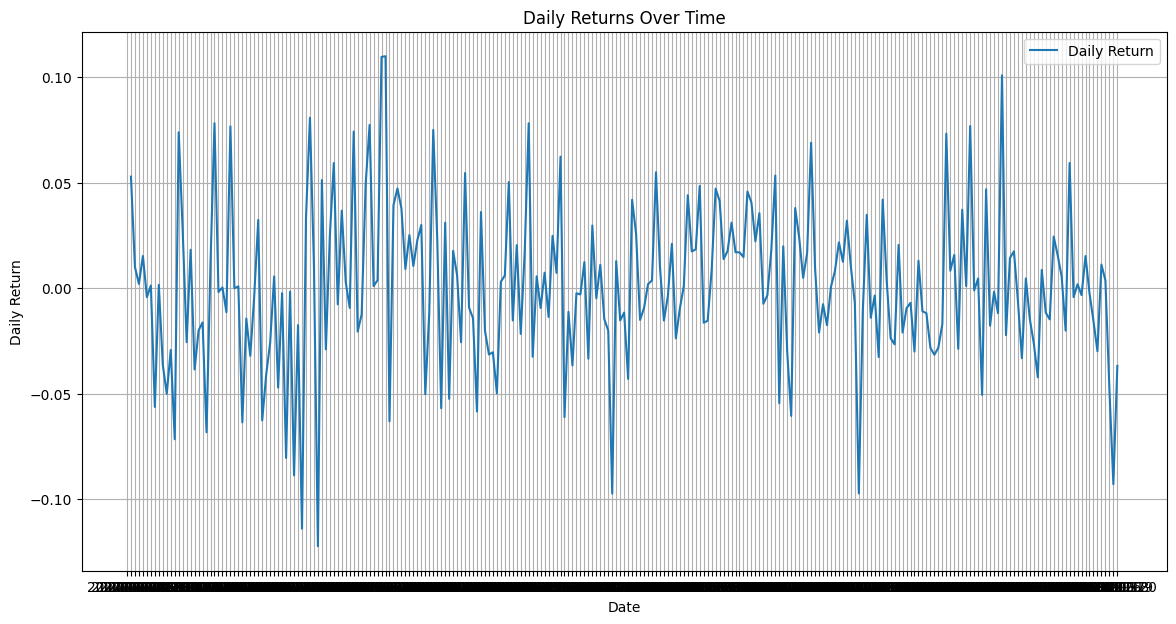

In [107]:
plt.figure(figsize=(14, 7))
plt.plot(df2['Date'], df2['Daily Return'], label='Daily Return')
plt.legend()
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

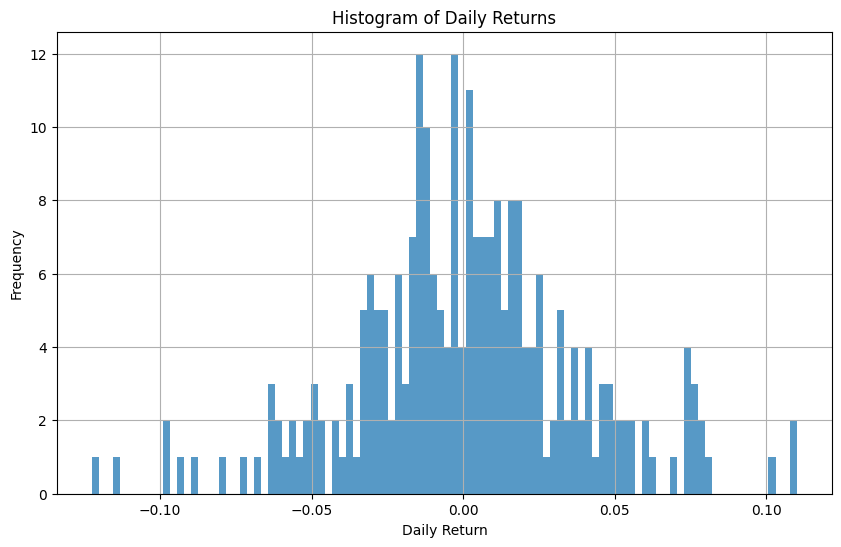

In [108]:
plt.figure(figsize=(10, 6))
df2['Daily Return'].hist(bins=100, alpha=0.75)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Portfolio Returns
Here, we define the weights of each stock in our portfolio and compute the portfolio returns.

In [109]:
weight_stock1=0.33
weight_stock2=0.33
weight_stock3=0.33

In [110]:
df['stock_return']=df['Daily Return']* weight_stock1
df1['stock_return']=df1['Daily Return']* weight_stock1
df2['stock_return']=df2['Daily Return']* weight_stock1

In [111]:
port_return=df['stock_return']+df1['stock_return']+df2['stock_return']

In [112]:
portfolio_cumulative_return = (1 + port_return).cumprod()


In [113]:
portfolio_cumulative_return

0           NaN
1      1.025979
2      1.008844
3      0.985840
4      0.993241
         ...   
245    1.213013
246    1.207701
247    1.175598
248    1.139496
249    1.110636
Name: stock_return, Length: 250, dtype: float64

In [114]:
 average_daily_return = port_return.mean()


In [115]:
average_daily_return

0.0006349223124867823

In [116]:
portfolio_volatility = port_return.std()


In [117]:
portfolio_volatility

0.020762287232533944

# Monte Carlo Simulation for Portfolio Optimization
To determine the best allocation of stocks in the portfolio, we run a simulation with 10,000 portfolios with random allocations of stocks. For each portfolio, we calculate:

1. Expected portfolio return
2. Expected portfolio volatility
3. Sharpe Ratio (return/volatility)

In [130]:
all_daily_returns = pd.concat([df['Daily Return'], df1['Daily Return'], df2['Daily Return']], axis=1)
all_daily_returns.columns = ['AAPL', 'AMZN', 'TSLA']

# Simulation
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(all_daily_returns.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)
np.random.seed(42)  # for reproducibility

In [137]:
for ind in range(num_portfolios):
    # Random weights and normalize
    weights = np.random.random(3)
    weights /= np.sum(weights)
    all_weights[ind, :] = weights
    ret_arr[ind] = np.sum((all_daily_returns.mean() * weights * 252))

    # Portfolio volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(all_daily_returns.cov() * 252, weights)))

    # Sharpe ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

# Efficient Frontier
This is a graphical representation of all the portfolios with various allocations, with the color representing the Sharpe Ratio.

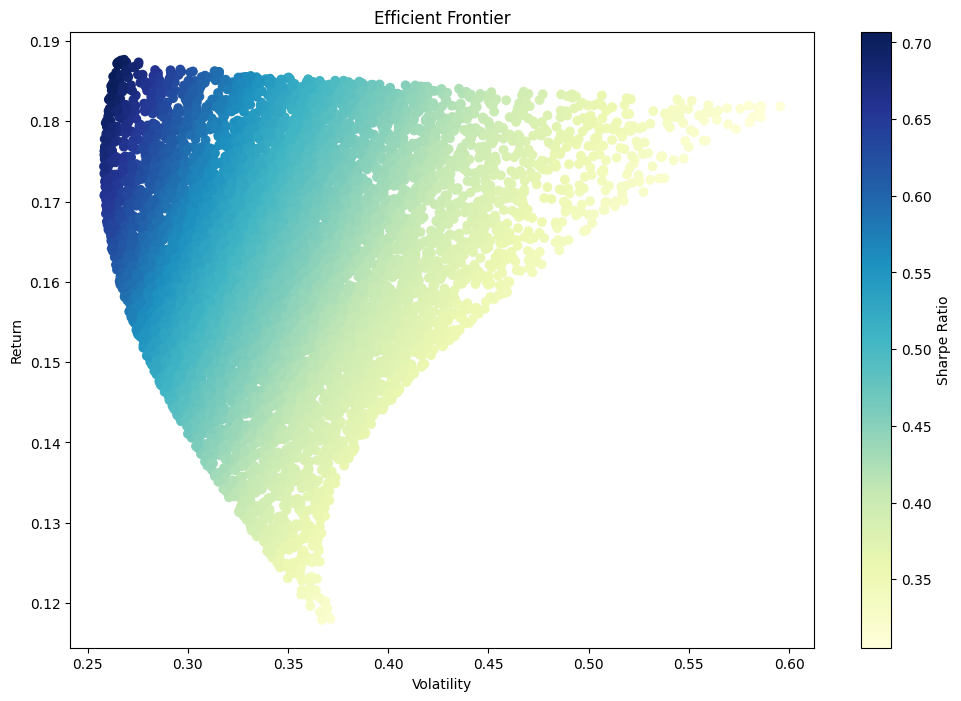

In [138]:
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='YlGnBu')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

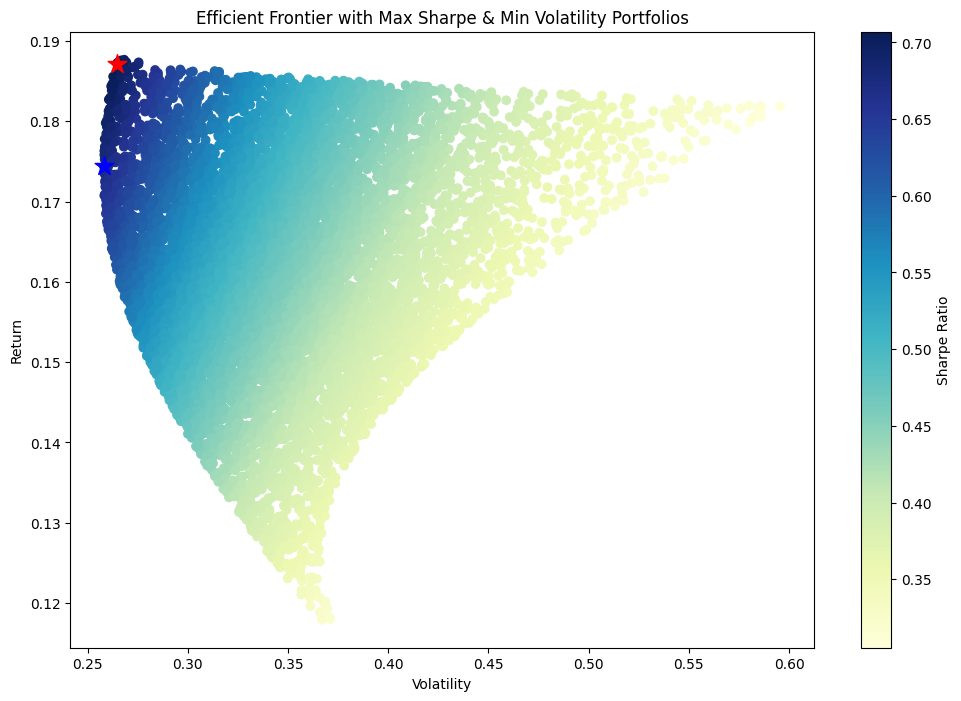

In [139]:
# Finding the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_arr)

# Finding the portfolio with the minimum volatility
min_vol_idx = np.argmin(vol_arr)

# Extracting the details of these portfolios
max_sharpe_return = ret_arr[max_sharpe_idx]
max_sharpe_volatility = vol_arr[max_sharpe_idx]

min_vol_return = ret_arr[min_vol_idx]
min_vol_volatility = vol_arr[min_vol_idx]

# Plotting the efficient frontier with the special portfolios highlighted
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='YlGnBu')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier with Max Sharpe & Min Volatility Portfolios')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200)
plt.scatter(min_vol_volatility, min_vol_return, c='blue', marker='*', s=200)
plt.show()


# Special Portfolios
From the simulation, we identify:

Portfolio with the maximum Sharpe Ratio
Portfolio with the minimum volatility
These portfolios represent the best risk-adjusted return and the least risk, respectively.



In [142]:
max_sharpe_weights = all_weights[max_sharpe_idx, :]

# Extracting the stock weights for the minimum volatility portfolio
min_vol_weights = all_weights[min_vol_idx, :]

print("Portfolio with Maximum Sharpe Ratio:")
print("AAPL Weight: {:.2f}".format(max_sharpe_weights[0]))
print("AMZN Weight: {:.2f}".format(max_sharpe_weights[1]))
print("TSLA Weight: {:.2f}".format(max_sharpe_weights[2]))

print("\nPortfolio with Minimum Volatility:")
print("AAPL Weight: {:.2f}".format(min_vol_weights[0]))
print("AMZN Weight: {:.2f}".format(min_vol_weights[1]))
print("TSLA Weight: {:.2f}".format(min_vol_weights[2]))

Portfolio with Maximum Sharpe Ratio:
AAPL Weight: 0.97
AMZN Weight: 0.01
TSLA Weight: 0.02

Portfolio with Minimum Volatility:
AAPL Weight: 0.80
AMZN Weight: 0.19
TSLA Weight: 0.01


# Value at Risk (VaR)
VaR represents the maximum potential loss in value of a risky portfolio over a defined period for a given confidence interval.

In [143]:
from scipy.stats import norm

# Calculate VaR for 95% confidence interval
confidence_level = 0.05

daily_returns = port_return.dropna()
VaR = daily_returns.quantile(confidence_level)

# Print the Value at Risk
print(f"Value at Risk (95% confidence): {VaR:.2%}")


Value at Risk (95% confidence): -2.95%


# Portfolio Beta
Beta is a measure of a stock's volatility in relation to the overall market. A beta of 1 indicates that the stock's price moves with the market.

In [144]:
# Assuming S&P 500 represents the market return
sp500_returns = pd.read_csv('^SPX.csv')['Adj Close'].pct_change().dropna()

beta = daily_returns.cov(sp500_returns) / sp500_returns.var()

# Print the beta coefficient
print(f"Portfolio Beta: {beta:.2f}")


Portfolio Beta: 1.63


In [165]:
all_daily_returns.to_csv('all_daily_returns.csv')
